# Parte 1 - Visus

## Importo Librerias y Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_transaction = pd.read_csv("/content/gdrive/MyDrive/Orga_Datos/Data/train_transaction.csv")

In [ ]:
train_identity = pd.read_csv("/content/gdrive/MyDrive/Orga_Datos/Data/train_identity.csv")

## Visu 1

In [ ]:
train_transaction_filtered_low = train_transaction.loc[train_transaction['TransactionAmt'] <train_transaction.TransactionAmt.quantile(.9)]

In [ ]:
train_transaction_filtered_high = train_transaction.loc[train_transaction['TransactionAmt'] > train_transaction.TransactionAmt.quantile(.9)]

<Figure size 1800x1200 with 0 Axes>

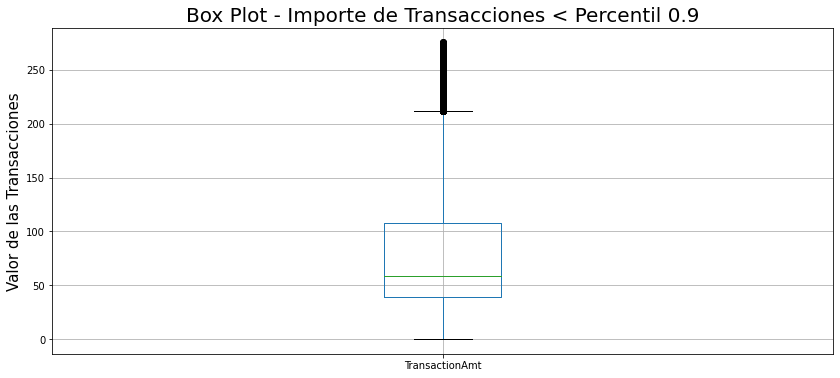

<Figure size 1800x1200 with 0 Axes>

In [ ]:
train_transaction_filtered_low.boxplot(column='TransactionAmt',figsize=(14,6))
plt.title('Box Plot - Importe de Transacciones < Percentil 0.9',fontsize=20)
plt.xticks(rotation=360)
plt.ylabel("Valor de las Transacciones",fontsize=15)
plt.figure(dpi=300)

<Figure size 1800x1200 with 0 Axes>

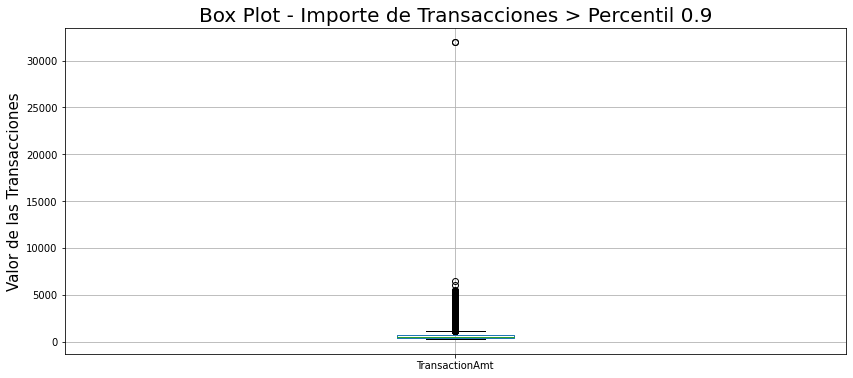

<Figure size 1800x1200 with 0 Axes>

In [ ]:
train_transaction_filtered_high.boxplot(column='TransactionAmt',figsize=(14,6))
plt.title('Box Plot - Importe de Transacciones > Percentil 0.9',fontsize=20)
plt.xticks(rotation=360)
plt.ylabel("Valor de las Transacciones",fontsize=15)
plt.figure(dpi=300)

## Visu 2 

<Figure size 1800x1200 with 0 Axes>

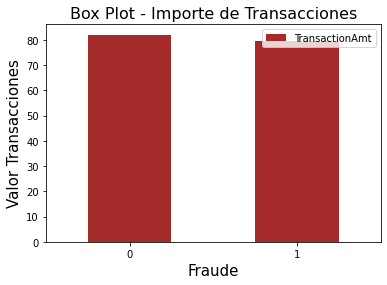

<Figure size 1800x1200 with 0 Axes>

In [ ]:
train_transaction_filtered_low[['isFraud','TransactionAmt']].groupby('isFraud').mean().plot(kind='bar',color='brown')
plt.title('Box Plot - Importe de Transacciones',fontsize=16)
plt.xticks(rotation=360)
plt.xlabel("Fraude",fontsize=15)
plt.ylabel("Valor Transacciones",fontsize=15)
plt.figure(dpi=300)

<Figure size 1800x1200 with 0 Axes>

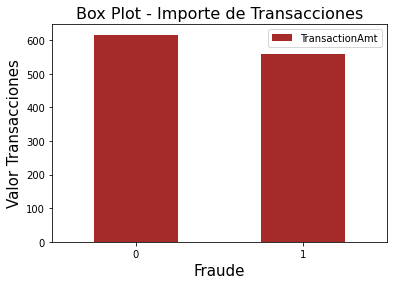

<Figure size 1800x1200 with 0 Axes>

In [ ]:
train_transaction_filtered_high[['isFraud','TransactionAmt']].groupby('isFraud').mean().plot(kind='bar',color='brown')
plt.title('Box Plot - Importe de Transacciones',fontsize=16)
plt.xticks(rotation=360)
plt.xlabel("Fraude",fontsize=15)
plt.ylabel("Valor Transacciones",fontsize=15)
plt.figure(dpi=300)

## Visu 3

In [ ]:
df_joined = train_transaction.merge(train_identity, left_on="TransactionID", right_on="TransactionID", how="outer")

In [ ]:
df_correlations = df_joined.corr(method ='pearson')

In [ ]:
lista_corr = df_correlations.iloc[1].nlargest(5).index.tolist() + df_correlations.iloc[1].nsmallest(5).index.tolist()

Text(0.5, 1.0, 'Columnas con Mayor y Menor Correlacion con el Target')

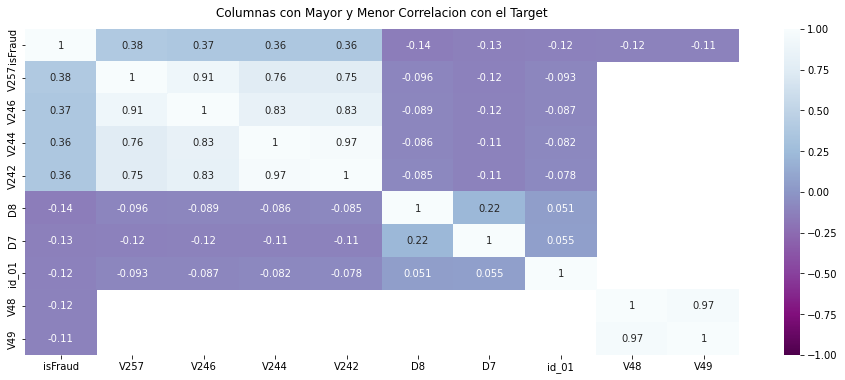

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_joined[lista_corr].corr(method ='pearson'),vmin=-1, vmax=1, annot=True,cmap='BuPu_r')
heatmap.set_title('Columnas con Mayor y Menor Correlacion con el Target', fontdict={'fontsize':12}, pad=12)

## Visu 4

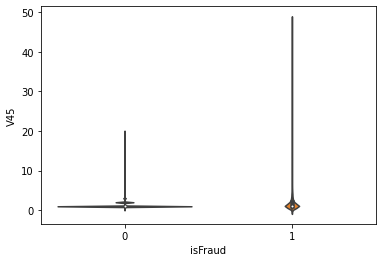

In [ ]:
sns.violinplot(x=df_joined.isFraud, y=df_joined.V45, data=df_joined)

## Visus 5

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000., 90000.]), <a list of 10 Text major ticklabel objects>)

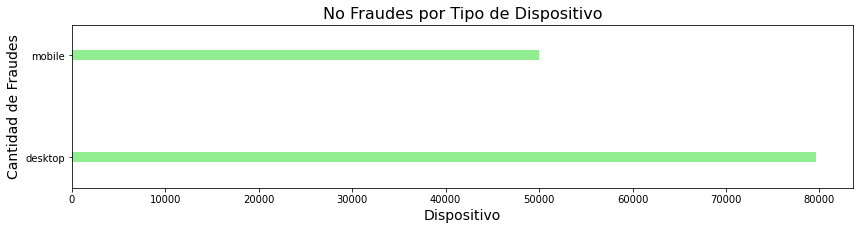

In [ ]:
graf = df_joined[['isFraud','DeviceType']].value_counts()[0].plot(kind='barh', y=['isFraud'],figsize=[14,3],width=0.1,color="lightgreen",)
graf.set_title("No Fraudes por Tipo de Dispositivo", fontsize=16)
graf.set_xlabel("Dispositivo",fontsize=14)
graf.set_ylabel("Cantidad de Fraudes",fontsize=14)
plt.xticks(rotation=360)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

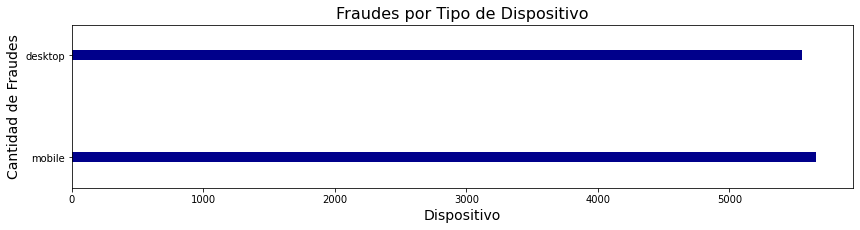

In [ ]:
graf = df_joined[['isFraud','DeviceType']].value_counts()[1].plot(kind='barh', y=['isFraud'],figsize=[14,3],width=0.1,color="darkblue")
graf.set_title("Fraudes por Tipo de Dispositivo", fontsize=16)
graf.set_xlabel("Dispositivo",fontsize=14)
graf.set_ylabel("Cantidad de Fraudes",fontsize=14)
plt.xticks(rotation=360)

## Visus 6

In [ ]:
df_joined.loc[df_joined['id_30'].str.contains("Windows",na=False),'id_30']='Windows'
df_joined.loc[df_joined['id_30'].str.contains("iOS",na=False),'id_30']='iOS'
df_joined.loc[df_joined['id_30'].str.contains("Mac",na=False),'id_30']='MAC OS'
df_joined.loc[df_joined['id_30'].str.contains("Android",na=False),'id_30']='Android'

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

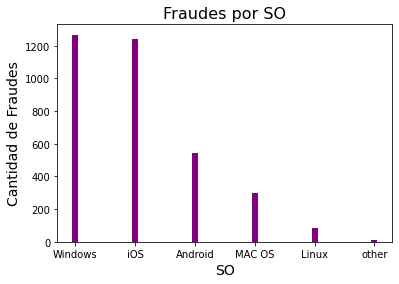

In [ ]:
graf = df_joined[['isFraud','id_30']].value_counts()[1].plot(kind='bar', y=['isFraud'],width=0.1,color="purple")
graf.set_title("Fraudes por SO", fontsize=16)
graf.set_xlabel("SO",fontsize=14)
graf.set_ylabel("Cantidad de Fraudes",fontsize=14)
plt.xticks(rotation=360)